<span style="font-family: 'Times New Roman'; font-size: 16px">
<span style="font-size: 26px;"><strong>1b. Registers: Quantum, Classical</strong></span><br><br>
<span style="font-size: 19px;">New functions used in this .ipynb</span><br>
<ul>
    <li>QuantumRegister()</li>
    <li>QuantumRegister().name</li>
    <li>QuantumRegister().size</li>
    <li>QuantumRegister().prefix</li>
    <li>ClassicalRegister()</li>
</ul>
<br>
<span style="font-size: 19px;">Previous functions used</span>
<ul>
    <li>QuantumCircuit()</li>
    <li>QuantumCircuit.draw()</li>
    <li>QuantumCircuit.x()</li>
    <li>QuantumCircuit.h()</li>
    <li>QuantumCircuit.swap()</li>
    <li>QuantumCircuit.cswap()</li>
    <li>QuantumCircuit.cx()</li>
    <li>QuantumCircuit.ch()</li>
    <li>QuantumCircuit.barrier()</li>
    <li>QuantumCircuit.measure()</li>
    <li>QuantumCircuit.measure_all()</li>
    <li>display()</li>
</ul>
</span>

In [5]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_ibm_runtime import QiskitRuntimeService

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

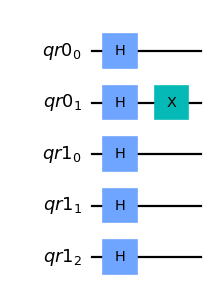

In [19]:
# Make a quantum circuit with 2 quantum registers
# The first register (let "qr0") must have 2 qubits 
# and the second (let "qr1") must have 3 qubits.
# add H gates to all qubits in the 1rst register     
# add H gates to all qubits in the 2nd register 
# add X gate only to qubit No.1 of the 1st register

# NOTE : The "QuantumRegister()" function creates a list (joint series) of N qubits.
#        One or more quantum registers can be passed as paremeters in QuantumCircuit()
#        either manually, e.g. QuantumCircuit(r1, r2, r3, ...), 
#        or in a list, e.g. rList = [r1, r2, r3, ...]; QuantumCircuit(rList)

# First, create the quantum registers
qReg0 = QuantumRegister(2, 'qr0')    # First quantum register "qr0" with 2 qubits
qReg1 = QuantumRegister(3, 'qr1')    # Second quantum register "qr1" with 3 qubits

# Create the quantum circuit with quantum registers
qc = QuantumCircuit(qReg0, qReg1)    # Quantum registers as parameters in QuantumCircuit()
                                     # (REGISTERS, not just integers to count qubits)
qc.h(qReg0)                          # add H gates to all qubits in the 1rst register     
qc.h(qReg1)                          # add H gates to all qubits in the 2nd register 
qc.x(qReg0[1])                       # add X gate to qubit No.1 of the 1st register

qc.draw(scale=0.8)

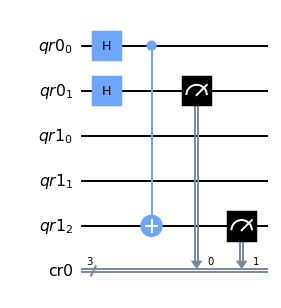

In [26]:
# Make a quantum circuit with 2 quantum registers and 1 classical register
# The first register (let "qr0") must have 2 qubits 
# the second (let "qr1") must have 3 qubits, and
# the classical register shall have 2+3=5 bits. 
# add H gates to all qubits in the 1rst and 2nd quantum register     
# and measure results on classical register

# NOTE : The "QuantumRegister()" function creates a list (joint series) of N qubits.
#        Quantum registers can be passed MANUALLY as paremeters in QuantumCircuit()
#        one by one, e.g. QuantumCircuit(r1, r2, r3, ...), 
#        AND NOT in a list, e.g. QuantumCircuit(rList) -- it is not supported. 


qReg0 = QuantumRegister(2, 'qr0')    
qReg1 = QuantumRegister(3, 'qr1')    

# After creating the quatum registers, create the classical ones
cReg0 = ClassicalRegister(3, 'cr0')       # classical register "cr0" with 5 bits

# Create the quantum circuit with quantum registers
qc = QuantumCircuit(qReg0, qReg1, cReg0)  # Quantum registers as parameters in QuantumCircuit()
                                     
qc.h(qReg0)                              
                       
qc.cx(qReg0[0], qReg1[2])                 # CNOT gate between the qubit[0] of the 1rst register 
                                          # and qubit[2] of the 2nd register 

qc.measure(qReg0[1], cReg0[0])            # measuring a specific qubit of a Quantum Register
                                          # and storing it in a specific bit of Classical Register
qc.measure(qReg1[2], cReg0[1])

qc.draw(scale=0.7)

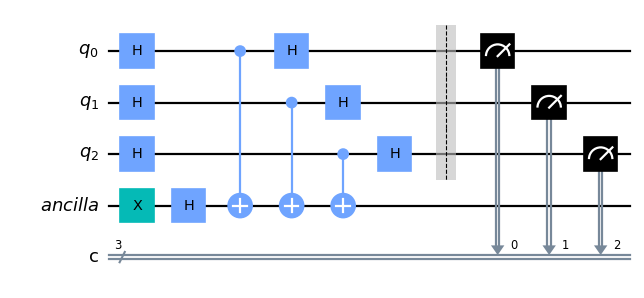

In [18]:
# Example IMPORTED from 
# https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html
# "Construct a 4-qubit Bernstein-Vazirani circuit using registers."

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qr = QuantumRegister(3, 'q')
anc = QuantumRegister(1, 'ancilla')
cr = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qr, anc, cr)

qc.x(anc[0])
qc.h(anc[0])
qc.h(qr[0:3])
qc.cx(qr[0:3], anc[0])
qc.h(qr[0:3])
qc.barrier(qr)
qc.measure(qr, cr)

qc.draw('mpl', scale=0.8)

Name of register (variable) 'qReg0' -> qr0
Size of register (number of qubits inside) 'qReg0' -> 2
Prefix of 'qReg0' -> q
--> changed prefix of 'qReg0' to ->  qub
instances_counter (default) -> count(0)


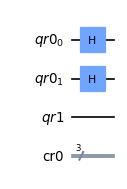

In [7]:
# USE ATTRIBUTES OF QUANTUM REGISTERS

# NOTE (1) : The ".name" returned the name of quantum register. 
#            -> NOT the name of variable in program, 
#               the one we gave as parameter in quantum register constructor 

# NOTE (2) : The ".size" returned the size of quantum register. 
#            -> By size, we mean how many qubits are inside the register

qReg0 = QuantumRegister(2, 'qr0')    
qReg1 = QuantumRegister(1, 'qr1')    
cReg0 = ClassicalRegister(3, 'cr0')       
qc = QuantumCircuit(qReg0, qReg1, cReg0)  
qc.h(qReg0)
print("Name of register (variable) 'qReg0' ->", qReg0.name)
print("Size of register (number of qubits inside) 'qReg0' ->", qReg0.size)
print("Prefix of 'qReg0' ->", qReg0.prefix)
qReg0.prefix = "qub"
print("--> changed prefix of 'qReg0' to -> ", qReg0.prefix)
print("instances_counter (default) ->", qReg0.instances_counter)

display(qc.draw(scale=0.6))
